In [1]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://www-us.apache.org/dist/spark/spark-2.4.7/spark-2.4.7-bin-hadoop2.7.tgz
!tar xf spark-2.4.7-bin-hadoop2.7.tgz #descomprime el fichero
!pip install -q findspark #instala spark

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64" #funciones dels sistema de python para cambiar variables de entorno y que funcione
os.environ["SPARK_HOME"] = "/content/spark-2.4.7-bin-hadoop2.7"

import findspark #para tener un contexto spark donde trabajar
findspark.init()
from pyspark import SparkContext
sc = SparkContext()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate() #para generar una spark sesion sql

In [2]:
nba_data = sc.textFile("partidosLigaNBA.csv")

In [3]:
nba_data.count() #count es una funcion de accion xq nos esta devolviendo datos

12908

In [4]:
nba_data.take(5) #debemos quitar la cabecera del fichero

['Date:Start..ET.:Visitor.Neutral:PTS:Home.Neutral:PTS.1',
 'Tue, Oct 30, 2007:"7:30 pm":Utah Jazz:117:Golden State Warriors:96',
 'Tue, Oct 30, 2007:"7:30 pm":Houston Rockets:95:Los Angeles Lakers:93',
 'Tue, Oct 30, 2007:"7:00 pm":Portland Trail Blazers:97:San Antonio Spurs:106',
 'Wed, Oct 31, 2007:"8:00 pm":Dallas Mavericks:92:Cleveland Cavaliers:74']

Vamos a ver como quitar la cabecera en spark

In [5]:
head_nba_data = nba_data.take(1)[0] #le damos un valor a take(1)[0]
wh_nba_data = nba_data.filter(lambda x: x != head_nba_data) #creamos una funcion filter con lambda para eliminar la cabecera
wh_nba_data.take(5) #hasta que no hacemos la funcion take de accion no se ejecuta la funcion lambda de arriba

['Tue, Oct 30, 2007:"7:30 pm":Utah Jazz:117:Golden State Warriors:96',
 'Tue, Oct 30, 2007:"7:30 pm":Houston Rockets:95:Los Angeles Lakers:93',
 'Tue, Oct 30, 2007:"7:00 pm":Portland Trail Blazers:97:San Antonio Spurs:106',
 'Wed, Oct 31, 2007:"8:00 pm":Dallas Mavericks:92:Cleveland Cavaliers:74',
 'Wed, Oct 31, 2007:"8:30 pm":Seattle SuperSonics:103:Denver Nuggets:120']

Ahora voy a aplicar una funcion map para separar los elementos en una lista para poder manipularlos.

In [6]:
wh_nba_data = nba_data.filter(lambda x: x != head_nba_data).map(lambda x: x.split(":")) 
wh_nba_data.take(5) #hasta que no hacemos la funcion take de accion no se ejecuta la funcion lambda de arriba

[['Tue, Oct 30, 2007',
  '"7',
  '30 pm"',
  'Utah Jazz',
  '117',
  'Golden State Warriors',
  '96'],
 ['Tue, Oct 30, 2007',
  '"7',
  '30 pm"',
  'Houston Rockets',
  '95',
  'Los Angeles Lakers',
  '93'],
 ['Tue, Oct 30, 2007',
  '"7',
  '00 pm"',
  'Portland Trail Blazers',
  '97',
  'San Antonio Spurs',
  '106'],
 ['Wed, Oct 31, 2007',
  '"8',
  '00 pm"',
  'Dallas Mavericks',
  '92',
  'Cleveland Cavaliers',
  '74'],
 ['Wed, Oct 31, 2007',
  '"8',
  '30 pm"',
  'Seattle SuperSonics',
  '103',
  'Denver Nuggets',
  '120']]

Ahora vamos a aplicar el [-1] para que nos coja el ultimo elemento de la lista

In [7]:
wh_nba_data = nba_data.filter(lambda x: x != head_nba_data).map(lambda x: x.split(":")[-1]) 
wh_nba_data.take(5) #hasta que no hacemos la funcion take de accion no se ejecuta la funcion lambda de arriba

['96', '93', '106', '74', '120']

Ahora vamos a pasar los numeros a enteros ya que estan en formato string

In [8]:
wh_nba_data = nba_data.filter(lambda s: s != head_nba_data) \
                      .map(lambda s: s.split(":")[-1]) \
                      .filter(lambda s_pvisit: s_pvisit.isdigit()) \
                      .map(lambda d_pvisit: int(d_pvisit)) 

# Primero creamos una funcion filter con lambda para quitar la cabecera

# Luego realizamos con la funcion split la separacion del fichero por el simbolo ":"

# Colocamos el lambda s cuando sea un string y colocamos lambda d_pvisit cuando sea un digito

# Usamos la funcion isdigit() para que filtre solo aquellas observaciones que sean digitos y no otras que contengan palabras

#por ultimo convertimos a entero los numeros que de otro modo serian strings

wh_nba_data.take(1500) #hasta que no hacemos la funcion take de accion no se ejecuta la funcion lambda de arriba

[96,
 93,
 106,
 74,
 120,
 119,
 101,
 112,
 104,
 102,
 106,
 80,
 99,
 95,
 101,
 103,
 102,
 85,
 110,
 87,
 120,
 91,
 69,
 113,
 92,
 98,
 96,
 123,
 89,
 111,
 78,
 88,
 133,
 82,
 88,
 92,
 115,
 119,
 88,
 97,
 103,
 95,
 107,
 83,
 91,
 104,
 89,
 104,
 112,
 103,
 87,
 119,
 104,
 105,
 119,
 89,
 94,
 93,
 88,
 98,
 96,
 103,
 97,
 115,
 87,
 106,
 96,
 103,
 104,
 107,
 101,
 85,
 102,
 103,
 110,
 91,
 101,
 92,
 71,
 106,
 101,
 96,
 91,
 100,
 118,
 90,
 82,
 95,
 72,
 72,
 113,
 103,
 122,
 82,
 117,
 91,
 99,
 86,
 105,
 103,
 113,
 102,
 107,
 117,
 91,
 116,
 110,
 104,
 90,
 84,
 95,
 102,
 108,
 95,
 88,
 103,
 105,
 112,
 123,
 92,
 99,
 122,
 103,
 118,
 89,
 70,
 92,
 123,
 90,
 110,
 100,
 108,
 115,
 105,
 117,
 73,
 105,
 82,
 87,
 109,
 106,
 104,
 105,
 100,
 101,
 125,
 88,
 102,
 83,
 107,
 105,
 112,
 114,
 82,
 98,
 116,
 105,
 111,
 98,
 94,
 101,
 89,
 79,
 110,
 86,
 93,
 127,
 101,
 128,
 107,
 99,
 83,
 111,
 98,
 105,
 113,
 87,
 101,
 93,
 99,
 

In [9]:
(wh_nba_data.max() - wh_nba_data.min()) / 10

10.9

In [10]:
wh_nba_data.min()

59

In [11]:
wh_nba_data.max()

168

In [12]:
def inter(x):
  if x<69.9:
    return 'int 1'
  elif x <80.8:
    return 'int 2'
  elif x<91.7:
    return 'int 3'
  elif x<102.6:
    return 'int 4'
  elif x<113.5:
    return 'int 5'
  elif x<124.4:
    return 'int 6'
  elif x<135.3:
    return 'int 7'
  elif x<146.2:
    return 'int 8'
  elif x<157.1:
    return 'int 9'
  elif x<=168:
    return 'int 10' 

In [13]:
inter(160)

'int 10'

In [14]:
type(wh_nba_data)

pyspark.rdd.PipelinedRDD

In [15]:
wh_nba_data_inter = nba_data.filter(lambda s: s != head_nba_data) \
                      .map(lambda s: s.split(":")[-1]) \
                      .filter(lambda s_pvisit: s_pvisit.isdigit()) \
                      .map(lambda d_pvisit: int(d_pvisit)) \
                      .map(lambda x : (inter(x),1)) \
                      .reduceByKey(lambda a, b: a + b) \
                      .collect()

#wh_nba_data_inter.take(1500)

In [16]:
wh_nba_data_inter

[('int 4', 4287),
 ('int 2', 439),
 ('int 6', 1717),
 ('int 8', 59),
 ('int 10', 1),
 ('int 9', 5),
 ('int 5', 3832),
 ('int 3', 2125),
 ('int 1', 37),
 ('int 7', 395)]

In [17]:
type(wh_nba_data_inter)

list

In [18]:
wh_nba_data_inter.sort()

In [19]:
import pandas as pd
df_wh_nba_inter = pd.DataFrame(wh_nba_data_inter)

In [20]:
type(df_wh_nba_inter)

pandas.core.frame.DataFrame

In [21]:
import numpy as np

In [22]:
import matplotlib.pyplot as plt

([<matplotlib.axis.YTick at 0x7ff523679d30>,
 <a list of 10 Text major ticklabel objects>)

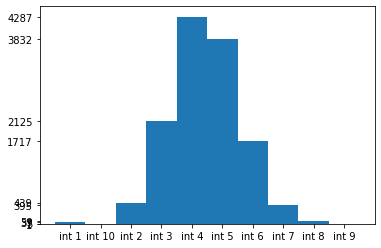

In [23]:
labels, ys = zip(*wh_nba_data_inter)
xs = np.arange(len(labels)) 
width = 1

plt.bar(xs, ys, width, align='center')

plt.xticks(xs, labels) #Replace default x-ticks with xs, then replace xs with labels
plt.yticks(ys)